In [4]:
import numpy as np 
from helpers import * 
from implementations import *
from utilities import *
import matplotlib.pyplot as plt

In [20]:
# hyperparameter tuning with only a part of the dataset
MAX_ROWS = 20000

x_data = np.genfromtxt('data/dataset/x_train.csv', delimiter=",", skip_header=1, max_rows=MAX_ROWS)
y_data = np.genfromtxt('data/dataset/y_train.csv', delimiter=",", skip_header=1, max_rows=MAX_ROWS)

x_data = normalize(x_data)

In [21]:
# choose which type of cleaning is the best

x_train = clean_X_0(x_data)  # replace nan with zero add bias column
y_train = clean_Y(y_data)

accuracy, f1_score = k_fold_cross_validation(x_train, y_train, reg_logistic_regression_batch, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]),
                                                            'max_iters': 5000, 'gamma':0.25, 'lambda_': 0, 'batch_size' : 100}, threshold=0.2)

print(f'nan -> 0 f1-score : {f1_score}, accuracy {accuracy}')

x_train = clean_X_median(x_data)  # replace nan with median add bias column

accuracy, f1_score = k_fold_cross_validation(x_train, y_train, reg_logistic_regression_batch, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]),
                                                            'max_iters': 5000, 'gamma':0.25, 'lambda_': 0, 'batch_size' : 100}, threshold=0.2)

print(f'nan -> median f1-score :{f1_score}, accuracy {accuracy}')


x_train = clean_X_mean(x_data)  # replace nan with mean add bias column

accuracy, f1_score = k_fold_cross_validation(x_train, y_train, reg_logistic_regression_batch, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]),
                                                            'max_iters': 5000, 'gamma':0.25, 'lambda_': 0, 'batch_size' : 100}, threshold=0.2)

print(f'nan -> mean f1-score :{f1_score}, accuracy {accuracy}')

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/utilities.py:289: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-3 and not half:
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/utilities.py:292: RuntimeWarning: invalid value encountered in double_scalars
  elif len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-5:


nan -> 0 f1-score : 0.3961613055675956, accuracy 0.8637500000000001
nan -> median f1-score :0.15853323222469637, accuracy 0.0877
nan -> mean f1-score :0.3909270146745669, accuracy 0.86995


No significant difference between mean and 0, if we normalize the data before. If we don't normalize mean is better

In [32]:
x_train = clean_X_mean(x_data)  
y_train = clean_Y(y_data)

initial_w = np.random.rand(x_train.shape[1])



best_param_lambda, best_param_gamma, best_param_threshold, best_batch_size = hyperparameter_tuning(x_train, y_train , 
                                            reg_logistic_regression_batch,lambdas= [0, 1e-4, 1e-5], 
                                            gammas=[0.2, 0.25, 0.3, 0.35], thresholds=[0.1, 0.2, 0.25, 0.3, 0.4], batch_sizes=[100, 500, 1000],
                                            model_params={'initial_w': initial_w ,'max_iters': 10000})


best_param_lambda, best_param_gamma, best_param_threshold, best_batch_size

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/utilities.py:289: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-3 and not half:
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/utilities.py:292: RuntimeWarning: invalid value encountered in double_scalars
  elif len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-5:
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


 lambda= 0, gamma= 0.2, batch_size = 100, threshold = 0.1 CV accuracy = 0.7966, f1_score = 0.3562
 lambda= 0, gamma= 0.2, batch_size = 500, threshold = 0.1 CV accuracy = 0.7909, f1_score = 0.3644
 lambda= 0, gamma= 0.2, batch_size = 1000, threshold = 0.1 CV accuracy = 0.7925, f1_score = 0.3664
 lambda= 0, gamma= 0.2, batch_size = 100, threshold = 0.2 CV accuracy = 0.8602, f1_score = 0.3724
 lambda= 0, gamma= 0.2, batch_size = 500, threshold = 0.2 CV accuracy = 0.8617, f1_score = 0.3740
 lambda= 0, gamma= 0.2, batch_size = 1000, threshold = 0.2 CV accuracy = 0.8632, f1_score = 0.3785
 lambda= 0, gamma= 0.2, batch_size = 100, threshold = 0.25 CV accuracy = 0.8773, f1_score = 0.3803
 lambda= 0, gamma= 0.2, batch_size = 500, threshold = 0.25 CV accuracy = 0.8815, f1_score = 0.3774
 lambda= 0, gamma= 0.2, batch_size = 1000, threshold = 0.25 CV accuracy = 0.8756, f1_score = 0.3682
 lambda= 0, gamma= 0.2, batch_size = 100, threshold = 0.3 CV accuracy = 0.8841, f1_score = 0.3536
 lambda= 0, ga

In [3]:
# load dataset for final training and prediction on test set

x_data = np.genfromtxt('data/dataset/x_train.csv', delimiter=",", skip_header=1)
y_data = np.genfromtxt('data/dataset/y_train.csv', delimiter=",", skip_header=1)
x_test = np.genfromtxt('data/dataset/x_test.csv', delimiter=",", skip_header=1)

# clean data
x_test_clean = clean_X_median(x_test)
y_data = clean_Y(y_data)
x_data = clean_X_median(x_data)

initial_w = np.random.rand(x_data.shape[1])

# train with optimal hyperparameters
w, loss = reg_logistic_regression(y_data.reshape(-1, 1), x_data, 1e-5, initial_w.reshape(-1, 1), 10000, 0.25)  # replace with best lambda, gamma

# predict with optimal threshold
y_pred = (sigmoid(x_test_clean @ w) >= 0.5).flatten()  # replace best threshold
y_pred = np.where(y_pred, 1, -1)

create_csv_submission(x_test[:, 0], y_pred, 'prediction.csv')

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


In [5]:


((y_pred == 1).sum() / len(y_pred)) * 100

42.276853875058286

In [143]:
w, losses = reg_logistic_regression_batch(y_train, x_train, np.random.rand(x_train.shape[1]), 0, 10000, 0.25)

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/tmp/ipykernel_4899/1594625279.py:14: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-3 and not half:
/tmp/ipykernel_4899/1594625279.py:17: RuntimeWarning: invalid value encountered in double_scalars
  elif len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 3e-5:


In [152]:
w, losses = reg_logistic_regression_batch(cleaned_data_y, cleaned_data_x, np.random.rand(x_train.shape[1]), 1e-5, 10000, 0.2)

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/tmp/ipykernel_4899/1594625279.py:14: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-3 and not half:
/tmp/ipykernel_4899/1594625279.py:17: RuntimeWarning: invalid value encountered in double_scalars
  elif len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 3e-5:


f1-score : 0.40833508735003154, accuracy 0.8715010590153442


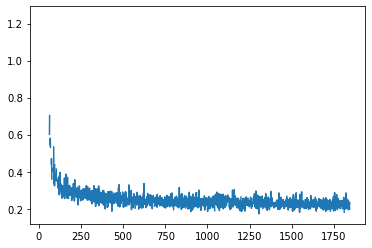

In [147]:
def predict_logistic(X, w, t): 
    return (sigmoid(X @ w) >= t).flatten()

y_pred = predict_logistic(x_test, w, 0.2)

print(f'f1-score : {compute_f1(y_test, y_pred)}, accuracy {(y_test == y_pred).sum() / len(y_pred)}')
plt.plot(losses)
plt.show()

In [149]:
w, losses = reg_logistic_regression_batch(y_data, x_data, np.random.rand(x_train.shape[1]), 0, 10000, 0.25)

x_test = np.genfromtxt('data/dataset/x_test.csv', delimiter=",", skip_header=1)

x_test_clean = clean_X_0(x_test)

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/tmp/ipykernel_4899/1594625279.py:14: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-3 and not half:
/tmp/ipykernel_4899/1594625279.py:17: RuntimeWarning: invalid value encountered in double_scalars
  elif len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 3e-5:


In [153]:
y_pred = (sigmoid(x_test_clean @ w) >= 0.2).flatten()
y_pred = np.where(y_pred, 1, -1)

create_csv_submission(x_test[:, 0], y_pred, 'prediction.csv')

((y_pred == 1).sum() / len(y_pred)) * 100

13.201802905493743

In [139]:
initial_w = np.random.rand(x_data.shape[1])

best_lambda, best_gamma, best_threshold = hyperparameter_tuning(x_data, y_data , reg_logistic_regression_batch,lambdas= [0, 1e-4, 1e-5], 
                                            gammas=[0.1, 0.15, 0.2, 0.25, 0.3], thresholds=[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
                                            model_params={'initial_w': initial_w ,'max_iters': 10000})

# best

/tmp/ipykernel_4899/1594625279.py:14: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-3 and not half:
/tmp/ipykernel_4899/1594625279.py:17: RuntimeWarning: invalid value encountered in double_scalars
  elif len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 3e-5:


 lambda= 0, gamma= 0.1, threshold = 0.1 CV accuracy = 0.7925, f1_score = 0.3533
 lambda= 0, gamma= 0.1, threshold = 0.15 CV accuracy = 0.8239, f1_score = 0.3566
 lambda= 0, gamma= 0.1, threshold = 0.2 CV accuracy = 0.8647, f1_score = 0.3805
 lambda= 0, gamma= 0.1, threshold = 0.25 CV accuracy = 0.8714, f1_score = 0.3479
 lambda= 0, gamma= 0.1, threshold = 0.3 CV accuracy = 0.8760, f1_score = 0.3368
 lambda= 0, gamma= 0.1, threshold = 0.35 CV accuracy = 0.8940, f1_score = 0.3228
 lambda= 0, gamma= 0.1, threshold = 0.4 CV accuracy = 0.8884, f1_score = 0.2955
 lambda= 0.0001, gamma= 0.1, threshold = 0.1 CV accuracy = 0.7927, f1_score = 0.3555
 lambda= 0.0001, gamma= 0.1, threshold = 0.15 CV accuracy = 0.8376, f1_score = 0.3772
 lambda= 0.0001, gamma= 0.1, threshold = 0.2 CV accuracy = 0.8572, f1_score = 0.3684
 lambda= 0.0001, gamma= 0.1, threshold = 0.25 CV accuracy = 0.8740, f1_score = 0.3498
 lambda= 0.0001, gamma= 0.1, threshold = 0.3 CV accuracy = 0.8831, f1_score = 0.3379
 lambda= 0

In [140]:
best_lambda, best_gamma, best_threshold

(0, 0.25, 0.25)

In [38]:
def remove_rows_by_indices(matrix, indices_to_remove):
    # Create a mask to select rows that are not in the list of indices to remove
    mask = np.ones(matrix.shape[0], dtype=bool)
    mask[indices_to_remove] = False

    # Apply the mask to the matrix to remove specified rows
    cleaned_matrix = matrix[mask]

    return cleaned_matrix

def remove_outliers_from_matrix(x_data, y_data, max_deviations, percentage):
    # Calculate the mean and standard deviation for the entire matrix
    mean = np.mean(x_data, axis=0)
    #print("mean = ", mean)
    std = np.std(x_data, axis=0)
    #print("std = ",std)
    
    # Calculate the absolute deviation from the mean for the entire matrix
    distance_from_mean = []
    for i in range(x_data.shape[0]):
        distance_from_mean.append( np.abs(x_data[i] - mean))
    #print("distance = ", distance_from_mean)

    distance_from_mean = np.array(distance_from_mean)

    #print("max_deviations * std = ", max_deviations * std)

    # Create a mask to identify outliers based on the absolute deviation
    outlier_sample = distance_from_mean > max_deviations * std

    #print("outlier samples = \n", outlier_sample)
    count = np.zeros(x_data.shape[0])
    samples_to_drop = []
    for i in range(x_data.shape[0]):
        count[i] = np.count_nonzero(outlier_sample[i])
        if count[i] > percentage * x_data.shape[1]:
            samples_to_drop.append(i)
    #print("count = ", count)
    #print("to drop = ", samples_to_drop)

    x_data_cleaned = remove_rows_by_indices(x_data, samples_to_drop)
    y_data_cleaned = remove_rows_by_indices(y_data, samples_to_drop)
    
    return x_data_cleaned, y_data_cleaned


# Example usage:
# Create a sample data matrix with outliers
data_matrix = np.array([[1, 1, 1],
                        [4, 5, 6],
                        [7, 80000, 900000],
                        [20000, 10000, 10000000],
                        [-20000, -10000, -10000000]])  # Outlier in each column 

# Remove outliers from the matrix using the function
cleaned_data_x, cleaned_data_y = remove_outliers_from_matrix(normalize(x_data),y_data,0.1, 0.28)

print("Original Data:")
print(x_data.shape)
print("\nCleaned Data:")
print(cleaned_data_x.shape)

Original Data:
(20000, 322)

Cleaned Data:
(20000, 322)


In [8]:
# hyperparameter tuning with only a part of the dataset
MAX_ROWS = 10000

x_data = np.genfromtxt('data/dataset/x_train.csv', delimiter=",", skip_header=1, max_rows=MAX_ROWS)
y_data = np.genfromtxt('data/dataset/y_train.csv', delimiter=",", skip_header=1, max_rows=MAX_ROWS)

# cleaned_data_x, cleaned_data_y = remove_outliers_from_matrix(x_data,y_data,0.01, 0.1)

# print("Original Data:")
# print(x_data.shape)
# print("\nCleaned Data:")
# print(cleaned_data_x.shape)

In [9]:
import numpy as np
import pandas as pd

def augment_features(df, degree=2):
    """
    Augment the features of a dataset.

    Parameters:
    - df: DataFrame containing the data.
    - degree: Degree of polynomial features to be generated.

    Returns:
    - Augmented DataFrame.
    """

    augmented_df = df.copy()
    numeric_columns = df.select_dtypes(['float64', 'int64']).columns

    # Polynomial features
    for col in numeric_columns:
        for deg in range(2, degree + 1):
            augmented_df[f'{col}_pow_{deg}'] = df[col] ** deg

    # Interaction terms
    for i in range(len(numeric_columns)):
        for j in range(i + 1, len(numeric_columns)):
            colname_i = numeric_columns[i]
            colname_j = numeric_columns[j]
            augmented_df[f'{colname_i}_x_{colname_j}'] = df[colname_i] * df[colname_j]

    return augmented_df

# Example
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': ['a', 'b', 'a', 'c', 'b']
}
df = pd.DataFrame(data)

x_train = augment_features(pd.DataFrame(x_data), degree=2)



/tmp/ipykernel_13132/4038613462.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  augmented_df[f'{col}_pow_{deg}'] = df[col] ** deg
/tmp/ipykernel_13132/4038613462.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  augmented_df[f'{colname_i}_x_{colname_j}'] = df[colname_i] * df[colname_j]


In [7]:
x_train.shape

(20000, 52647)

In [ ]:

k_fold_cross_validation(x_train, y_train, reg_logistic_regression_batch, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]),
                                                         'max_iters': 5000, 'gamma':0.25, 'lambda_': 0, 'batch_size' : 100}, threshold=0.2)
